1


Text(0.5, 1.0, 'Thresholded Inverse Sobelxy')

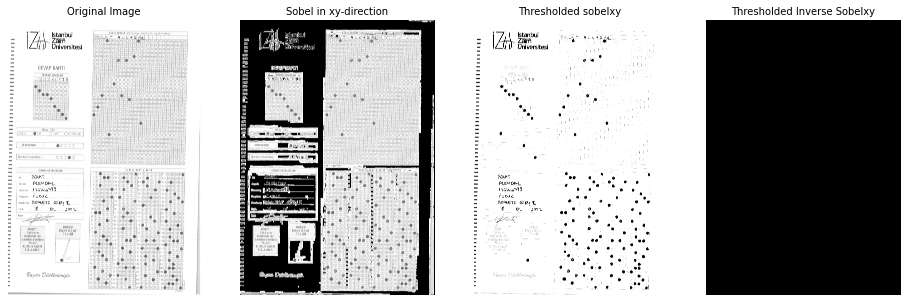

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
path = r"C:\Danyal\Work\FAST\Semester 5\Digital Image Processing\Project\Optical-Mark-Recognition\Dataset\unnamed (4).jpg"
img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
temp = np.zeros_like(img)
img1 = img - 255
# gray =  cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh, out = cv2.threshold(img,160,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(out,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print (len(contours))
cv2.drawContours(temp,contours,-1,(0,0,255),2)
# cv2.imshow('Contours', out)
# cv2.waitKey(0)
# cv2.destroyAllWindows
fig, axs = plt.subplots(1,4,figsize=(16,8))

axs[0].imshow(img,cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image',fontsize='medium')

axs[1].imshow(img1,cmap='gray')
axs[1].axis('off')
axs[1].set_title('Sobel in xy-direction',fontsize='medium')

axs[2].imshow(out,cmap='gray')
axs[2].axis('off')
axs[2].set_title('Thresholded sobelxy',fontsize='medium')

axs[3].imshow(temp, cmap='gray')
axs[3].axis('off')
axs[3].set_title('Thresholded Inverse Sobelxy',fontsize='medium')
# plt.imshow(out, cmap='gray'), plt.axis('off')
# plt.imshow(temp, cmap='gray'), plt.axis('off')

References:

https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python

https://stackoverflow.com/questions/24101524/finding-median-of-list-in-python

https://note.nkmk.me/en/python-opencv-pillow-image-size/


420
2.0
3.0
0 3.0 0 11.0


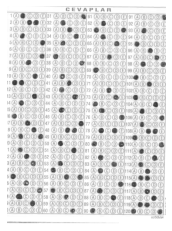

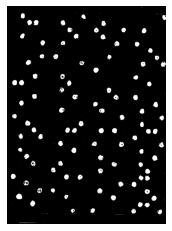

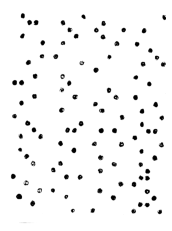

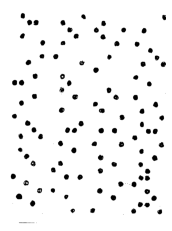

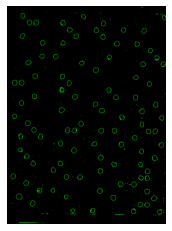

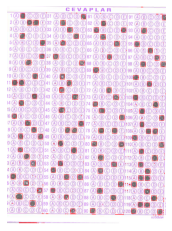

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
path = r"C:\Danyal\Work\FAST\Semester 5\Digital Image Processing\Project\Optical-Mark-Recognition\Dataset\unnamed (4).jpg"
img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
# TODO : Reading the image again in coloured mode
img_color = cv2.imread(path,cv2.IMREAD_COLOR)
# img = img - 255
img_color = img_color[3770:7200, 2141:4500]
img = img[3770:7210, 2141:4500]
img = cv2.GaussianBlur(img,(3,3),1,0)
thresh, out = cv2.threshold(img,150,255,cv2.THRESH_BINARY)
# Applying dilation first since image not negative
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(out,kernel,iterations = 1)
#Applying erosion with a different kernel
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(dilation,kernel,iterations = 1)
# edged = cv2.Canny(out, 30, 200)

#Function to calculate Median value of a list
def median(lst):
    sortedLst = sorted(lst)
    lstLen = len(lst)
    index = (lstLen - 1) // 2
   
    if (lstLen % 2):
        return sortedLst[index]
    else:
        return (sortedLst[index] + sortedLst[index + 1])/2.0

out = out - 255
width = []
height = []
contours, hierarchy = cv2.findContours(out,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    x,y,w,h = cv2.boundingRect(contours[i])
    width.append(w)
    height.append(h)
    cv2.rectangle(img_color, (x, y), (x+w, y+h), (255, 0, 0), 4)
print (len(contours))

#Printing the median values of the width and height to get size of one row of options
print(median(width))
print(median(height))

# Dimensions of one row of choices will likely be this, 5 options so 5* width and 1/2 width for range
row_width = (median(width) * 5) + (median(width) * 0.5)
row_height = median(height)

rows = []
img_height, img_width = img.shape
x = y = 0 
print(y, y + row_height, x, x + row_width)
while x < img_width:
    y = 0
    while y < img_height:
        new_image = img_color[int(y): int(y + row_height), int(x): int(x + row_width)]
        rows.append(new_image)
        # plt.imshow(new_image)
        # plt.axis('off')
        # plt.show()
        y += row_height
    x += row_width

# print(contours)
# TODO : Drawing contours
temp = np.zeros_like(img_color)
cv2.drawContours(temp,contours,-1,(0,255,0),3)

# cv2.imshow('Contours', out)
# cv2.waitKey(0)
# cv2.destroyAllWindows

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(out, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(dilation, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(erosion, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(temp, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(img_color)
plt.axis('off')
plt.show()